Misurazioni di CO2
- https://gml.noaa.gov/aftp/data/trace_gases/co2/pfp/surface/co2_surface-pfp_1_ccgg_ASCIItext.zip
- https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv

crescita della popolazione
https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_General/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx

deforestazione
- https://ourworldindata.org/deforestation
- blob:https://ourworldindata.org/dd888c14-a03c-4337-8bce-80b500645beb
- blob:https://ourworldindata.org/93fbc00d-961c-48e5-aead-5e66b944adb8
- blob:https://ourworldindata.org/7606fe55-a2bf-4756-a1b4-2d0743bdbf74

eruzioni vulcaniche
- https://www.ngdc.noaa.gov/hazel/view/hazards/volcano/event-data?maxYear=2020&minYear=1950
- blob:https://www.ngdc.noaa.gov/22c32b0e-0397-42d5-8256-f34c565cf1dc

STUDIO DI CORRELAZIONE TRA LA DEFORESTAZIONE LA CO2 E LA CRESCITA DELLA POPOLAZIONE

In [1]:
# importiamo le librerie necessarie per il nostro studio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# configuriamo le impostazioni di visualizzazione
sns.set_style('whitegrid')
sns.set_palette('Set2')

# importiamo le librerie di sistema
import os
import sys

In [2]:
# creiamo il percorso di path 
path = sys.path[0] + '/'

# muoviamoci indietro di una cartella
dataset_path = os.path.abspath(os.path.join(path, os.pardir))

# creiamo il percorso della cartella di lavoro dei dataset
# work_dir = dataset_path + '/dataset/defores/'
work_dir = path + 'dataset/defores/'

# creiamo il percorso delle librerie
#lib_path = dataset_path + '/librerie/'

# aggiungiamo il percorso delle librerie al percorso di ricerca delle funzioni
# https://www.velociraptus.com/posts/py_import/
#sys.path.append(lib_path)

print(work_dir)
#print(lib_path)
print(path)

/home/onizuka-host/Zoho WorkDrive (Catalano Consulenze Tecniche)/My Folders/Documenti personali_/Corsi/Scuola di Python con Jensen/Esercizi/jensen/Tillämpad AI, datautvinning, maskininlärning och deep learning/ML/Esercitazioni/dataset/defores/
/home/onizuka-host/Zoho WorkDrive (Catalano Consulenze Tecniche)/My Folders/Documenti personali_/Corsi/Scuola di Python con Jensen/Esercizi/jensen/Tillämpad AI, datautvinning, maskininlärning och deep learning/ML/Esercitazioni/


In [3]:
# elminiamo i file che non ci servono se esistono creati durante l'esecuzione precedente dello script
list_file_to_remove = [
    'CO2.csv', 
    'CO2_1.csv', 
    'forest_area.csv', 
    'forest_area_poly.csv',
    'pop.csv',
    'CO2_pop_volc_forest.csv',
    'vulcano.csv'
    ]
for i in list_file_to_remove:
    if os.path.exists(work_dir + i):
        try:
            os.remove(work_dir + i)
            print("The file %s removed" % (work_dir + i))
        except OSError as e:
            print("Error: %s : %s" % (work_dir + i, e.strerror))
    else:
        print("The file does not exist")

The file /home/onizuka-host/Zoho WorkDrive (Catalano Consulenze Tecniche)/My Folders/Documenti personali_/Corsi/Scuola di Python con Jensen/Esercizi/jensen/Tillämpad AI, datautvinning, maskininlärning och deep learning/ML/Esercitazioni/dataset/defores/CO2.csv removed
The file /home/onizuka-host/Zoho WorkDrive (Catalano Consulenze Tecniche)/My Folders/Documenti personali_/Corsi/Scuola di Python con Jensen/Esercizi/jensen/Tillämpad AI, datautvinning, maskininlärning och deep learning/ML/Esercitazioni/dataset/defores/CO2_1.csv removed
The file /home/onizuka-host/Zoho WorkDrive (Catalano Consulenze Tecniche)/My Folders/Documenti personali_/Corsi/Scuola di Python con Jensen/Esercizi/jensen/Tillämpad AI, datautvinning, maskininlärning och deep learning/ML/Esercitazioni/dataset/defores/forest_area.csv removed
The file /home/onizuka-host/Zoho WorkDrive (Catalano Consulenze Tecniche)/My Folders/Documenti personali_/Corsi/Scuola di Python con Jensen/Esercizi/jensen/Tillämpad AI, datautvinning, m

COMINCIAMO CON CREARE UN UNICO DATASET CON LA MEDIA DEI VALORI DI CO2 DELLE VARIE STAZIONI DI MISURAZIONE
DIVISE PER ANNO

In [4]:
# crea una lista di file nella cartella di lavoro dei dataset
file_list = os.listdir(work_dir + 'txt/')
print(file_list)

# importiamo la funzione per convertire i file txt in csv dalla cartella delle librerie
from librerie.varie import convert_txt_to_csv

# convertiamo tutti i file txt in csv
for i in file_list:
    convert_txt_to_csv(work_dir, 'txt', 'csv', i)

# creiamo una lista dei file csv
csv_list = os.listdir(work_dir + 'csv/')

# creiamo una funzione per creare un dataframe con i dati di tutti i dataset
def create_df(file_list):
    # creiamo l'oggetto dataframe
    df = pd.DataFrame()

    # creiamo un ciclo for per leggere tutti i file csv e creare un dataframe con i dati
    for i in file_list:
        df_temp = pd.read_csv(work_dir + 'csv/' + i, sep=' ')
        # creiamo una colonna con il nome del dataset in modo poi da poterlo usare come chiave per il nome della colonna
        name_data = df_temp['site_code'].unique()[0]
        # ora estraiamo solo le colonne che ci interessano e cambiamo il nome della colonna value con il nome del dataset
        df_temp = df_temp[['year', 'value']].copy()
        df_temp = df_temp.rename(columns={'value': name_data})
        # raggruppiamo per anno e calcoliamo la media dei valori
        df_temp = df_temp.groupby('year').mean()
        # uniamo i dataframe
        df = pd.concat([df, df_temp], axis=1)
        # rinominiamo la colonna con la media dei valori
        df['CO2'] = df.mean(axis=1)
        # ordina le righe in ordine numerico crescente 
        df = df.sort_index()

    return df['CO2']

df = create_df(csv_list)
df.to_csv(work_dir + '/CO2.csv')

# ricaviamo un secondo file con i dati della sola stazione di Mauna Loa
df1 = pd.read_csv(work_dir + '/co2_mm_mlo.csv')
df1 = df1[['year', 'average']]
df1.rename(columns={'average': 'CO2'}, inplace=True)
df1 = df1.groupby('year').mean()
df1.to_csv(work_dir + '/CO2_1.csv')

['co2_lac_surface-pfp_1_ccgg_event.txt', 'co2_mvy_surface-pfp_1_ccgg_event.txt', 'co2_mbo_surface-pfp_1_ccgg_event.txt', 'co2_wgc_surface-pfp_1_ccgg_event.txt', 'co2_crv_surface-pfp_1_ccgg_event.txt', 'co2_sct_surface-pfp_1_ccgg_event.txt', 'co2_msh_surface-pfp_1_ccgg_event.txt', 'co2_inx_surface-pfp_1_ccgg_event.txt', 'co2_mlo_surface-pfp_1_ccgg_event.txt', 'co2_hfm_surface-pfp_1_ccgg_event.txt', 'co2_mrc_surface-pfp_1_ccgg_event.txt', 'co2_spf_surface-pfp_1_ccgg_event.txt', 'co2_klm_surface-pfp_1_ccgg_event.txt', 'co2_neb_surface-pfp_1_ccgg_event.txt', 'co2_tmd_surface-pfp_1_ccgg_event.txt', 'co2_wbi_surface-pfp_1_ccgg_event.txt', 'co2_bao_surface-pfp_1_ccgg_event.txt', 'co2_lef_surface-pfp_1_ccgg_event.txt', 'co2_nwb_surface-pfp_1_ccgg_event.txt', 'co2_wkt_surface-pfp_1_ccgg_event.txt', 'co2_amt_surface-pfp_1_ccgg_event.txt', 'co2_mwo_surface-pfp_1_ccgg_event.txt', 'co2_nwf_surface-pfp_1_ccgg_event.txt', 'co2_str_surface-pfp_1_ccgg_event.txt', 'co2_bwd_surface-pfp_1_ccgg_event.txt',

ORA ANALIZIAMO IL DATASET DELL'ANDAMENTO DELLA CRESCITA DELLA POPOLAZIONE

In [5]:
# creiamo una lista di file nella cartella di lavoro dei dataset
dataset_list = os.listdir(work_dir)

pop_list = []
for i in dataset_list:
    #print(i)
    if 'WPP' in i: 
        pop_list.append(i)

df = pd.read_csv(work_dir + pop_list[0], encoding='latin-1')

# estraiamo l'elenco delle colonne che ci interessano
col = [
    'Year',
    'Total Population, as of 1 July (thousands)', 
    'Population Density, as of 1 July (persons per square km)'    
    ]

# creiamo un dataframe con i dati che ci interessano
df = df[col].copy()

# rinominiamo le colonne
df.rename(columns={
    'Year': 'year', 
    'Total Population, as of 1 July (thousands)': 'pop', 
    'Population Density, as of 1 July (persons per square km)': 'pop_density'}, 
    inplace=True)

# creiamo la colonna della superficie occupata dalla popolazione

# convertiamo la colonna pop e pop_density in float
df['pop'] = df['pop'].str.replace(' ', '').astype(float)
df['pop_density'] = df['pop_density'].str.replace(',', '.').astype(float)
df['pop_area'] = round(df['pop'] / df['pop_density'], 2)

df.to_csv(work_dir + '/pop.csv')


ORA ANALIZZIAMO I DATASET DELLA DEFORESTAZIONE

['annual-change-forest-area.csv', 'forest-area-as-share-of-land-area.csv', 'agricultural-area-per-capita.csv']
      year  forest_area_%
7850  1990      32.518625
7851  1991      32.458458
7852  1992      32.398291
7853  1993      32.338124
7854  1994      32.277957
Best r2:  0.9996551288901943
Best degree:  3


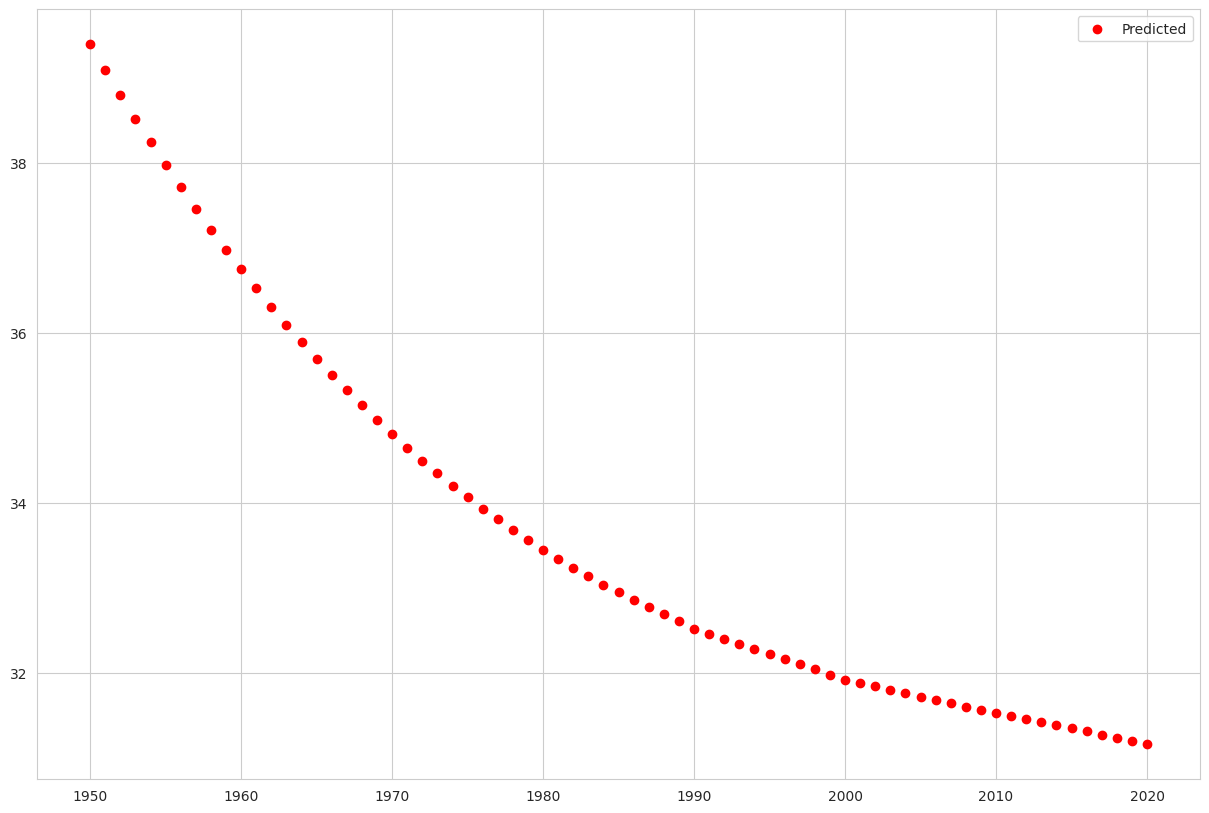

In [6]:
# creiamo una lista di file nella cartella di lavoro dei dataset
dataset_list = os.listdir(work_dir)

forset_list = []
for i in dataset_list:
    #print(i)
    if 'area' in i: 
        forset_list.append(i)

print(forset_list)

# analiziamo il secondo dataset che contiene i dati della foresta
df2 = pd.read_csv(work_dir + '/' + forset_list[1], encoding='latin-1')
df2 = df2[df2['Entity'] == 'World']
df2.drop(columns=['Code', 'Entity'], inplace=True)
df2.rename(columns={'Year': 'year', 'Forest cover': 'forest_area_%'}, inplace=True)
df2.to_csv(work_dir + '/forest_area.csv')
print(df2.head())

# cerchiamo di completare il dataset della deforestazione con i dati mancanti 
# facendo una regressione polinomiale usando numpy
# carichiamo il dataset della forestazione
df_forests = pd.read_csv(work_dir + 'forest_area.csv').drop(columns=['Unnamed: 0'])

# carichiamo ora le librerie per la regressione lineare lineare e polinomiale, le metriche e la divisione del dataset
# usiamo numpy per creare un array con i valori predetti
# https://runebook.dev/it/docs/numpy/reference/generated/numpy.polyfit
# importiamo le librerie necessarie per il nostro studio che si trovano nella cartella librerie del percorso di lavoro
#import RegPoly as RP
from librerie.RegPoly import Rgpoly as RP
from librerie.RegPoly import best_degree as BD

# cominciamo a creare le variabili indipendenti e dipendenti
X = df_forests['year'].values.reshape(-1, 1)
y = df_forests['forest_area_%'].values.reshape(-1, 1)

# facciamo le previsione con il modello per gli anni tra il 1950 e il 1990
x_pre = np.arange(1950, 1990).reshape(-1, 1)

best_degree, best_r2 = BD(X, y, 1, 3)

print('Best r2: ', best_r2)
print('Best degree: ', best_degree)

# creiamo un polinomio con il miglior grado
rp = RP(best_degree)
rp.fit(X, y)
y_poly_pred = rp.predict(x_pre)

# creiamo un dataframe con i valori predetti e quelli reali
df = pd.DataFrame({'year': X.flatten(), 'Predicted': y.flatten()})
df_poly_pre = pd.DataFrame({'year': x_pre.flatten(), 'Predicted': y_poly_pred.flatten()})
df_poly = pd.concat([df, df_poly_pre])

# visualizziamo i dati
plt.figure(figsize=(15, 10))
plt.scatter(df_poly['year'], df_poly['Predicted'], color='red', label='Predicted')
plt.legend()
plt.show()

# ordiniamo il dataframe in base all'anno
df_poly = df_poly.sort_values(by='year')
# ricreiamo l'indice
df_poly.reset_index(drop=True, inplace=True)
df_poly.to_csv(work_dir + '/forest_area_poly.csv')


ANALIZZIAMO ORA LA COMPARTECCIPAZIONE DELL'ATTIVITA' VULCANICA SULLA CO2 STUDIANDO I DATI DELLE ERUZIONI VULCANICHE

Il dataset delle eruzioni vulcaniche ha come parametro fondamentale il VEI. 
Il VEI è un indice che misura la quantità di materiale vulcanico espulso in atmosfera durante un'eruzione.
Il VEI è una scala logaritmica, quindi un VEI 2 è 10 volte più potente di un VEI 1, un VEI 3 è 10 volte più potente di un VEI 2 e così via.


Best r2:  0.9713761753697666
Best degree:  30


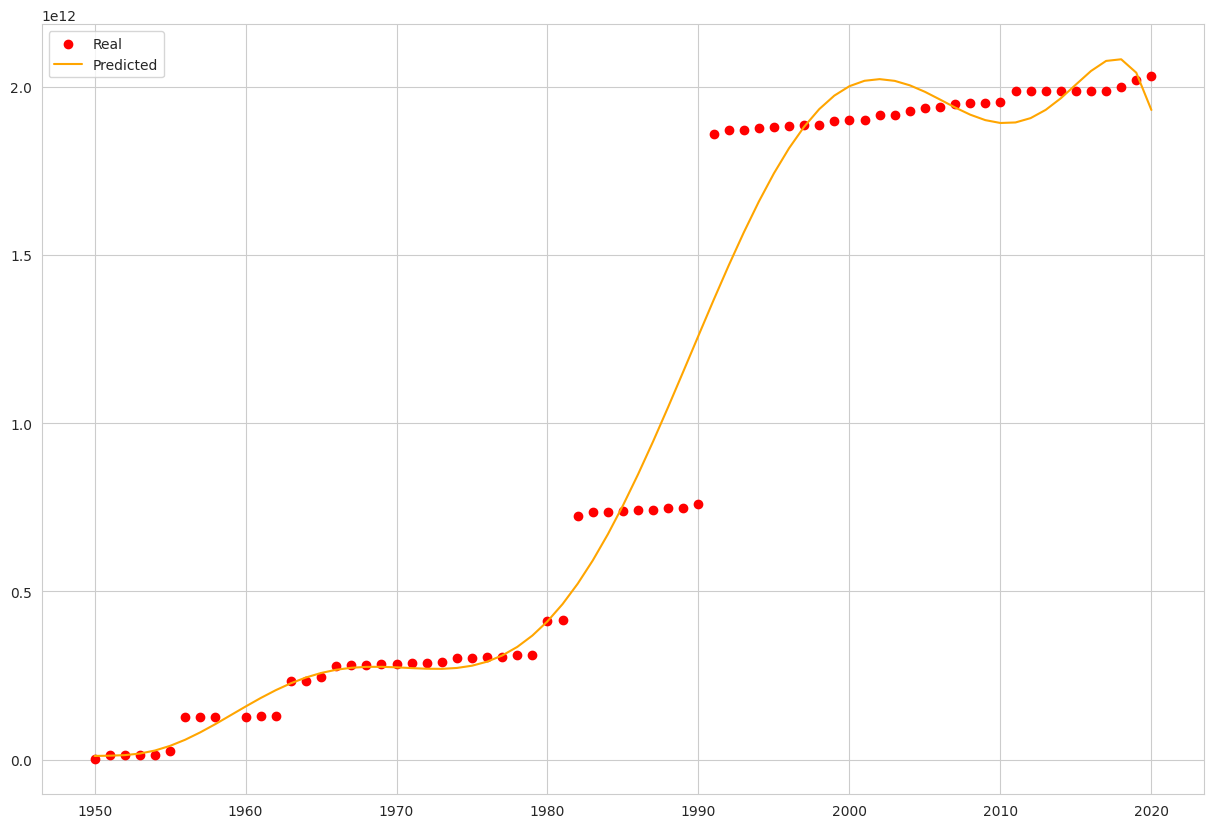

In [7]:
# carichiamo la tabella del vei
vei = pd.read_csv(work_dir + '/vei.csv')

# rinominiamo le colonne per praticita'
vei.rename(columns={
    'VEI': 'vei', 
    'General Description': 'description',
    'Cloud Column Height (km)': 'cloud_column_height_km',
    'Volume (m3)': 'volume_m3',
    'Classifications': 'classifications'
    }, inplace=True)

# il valore in volume_m3 è una stringa con il valore in notazione scientifica
# convertiamo il valore in float come 10 elevato al valore in volume_m3
vei['volume_m3'] = vei['volume_m3'].astype(float)

#print(vei.head(10))

# creiamo una funzione che associati al valore del vei ci restituisca il volume corrispondente
# creiamo un dizionare con chiave il valore del vei e valore il volume
vei_dict = dict(zip(vei['vei'], vei['volume_m3']))

#print(vei_dict)

# carichiamo il dataset sulla attività vulcanica
df = pd.read_csv(work_dir + '/volcano-events-2023-07-15_11-52-51_+0200.csv')

# teniamo solo le colonne di nostro interesse
# 'Year', 'VEI'
df = df[['Year', 'VEI']].copy()
df.rename(columns={'Year': 'year', 'VEI': 'vei'}, inplace=True)
# mettiamo nei campi nulli il valore 0
df['vei'].fillna(0, inplace=True)

# applichiama la funzione al dataframe
df['volume_m3'] = df['vei'].apply(lambda x: vei_dict[x])
del df['vei']

# raggruppiamo per anno e calcoliamo la somma dei volumi
df = df.groupby('year').sum()
df['volume_sum'] = df['volume_m3'].cumsum()

# calcoliamo la curva che meglio approssima i dati
# creiamo un oggetto LinearRegression polinomiale

# creiamo le variabili indipendenti e dipendenti
X = df.index.values.reshape(-1, 1)
y = df['volume_sum'].values.reshape(-1, 1)

from librerie.RegPoly import Rgpoly as RP
from librerie.RegPoly import best_degree as BD

best_degree, best_r2 = BD(X, y, 1, 50)

print('Best r2: ', best_r2)
print('Best degree: ', best_degree)

# creiamo un polinomio con il miglior grado
rp = RP(best_degree)
rp.fit(X, y)
y_poly_pred = rp.predict(X)

# creiamo un dataframe con i valori predetti e quelli reali
df = pd.DataFrame({'year': X.flatten(), 'Real': y.flatten(), 'Predicted': y_poly_pred.flatten()})
df = df.sort_values(by='year')
df.to_csv(work_dir + '/vulcano.csv')

# visualizziamo i dati
plt.figure(figsize=(15, 10))
plt.scatter(df['year'], df['Real'], color='red', label='Real')
plt.plot(df['year'], df['Predicted'], color='orange', label='Predicted')
plt.legend()
plt.show()

ORA UNIAMO I DATASET DELLA CRESCITA DELLA POPOLAZIONE E DELLA DEFORESTAZIONE E DELLA co2 E CERCHIAMO DI TROVARE UNA CORRELAZIONE

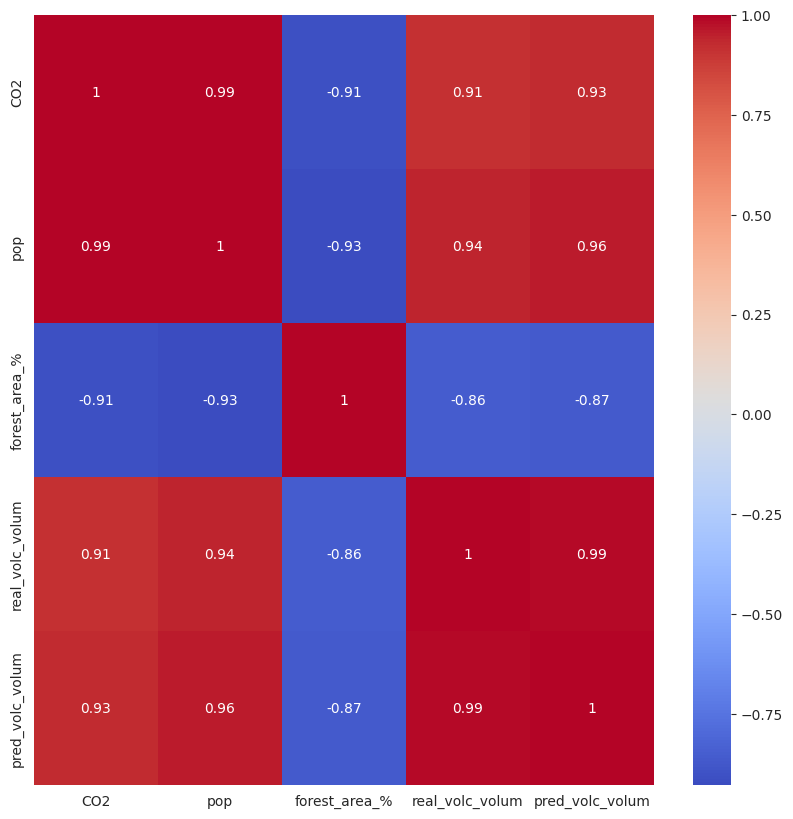

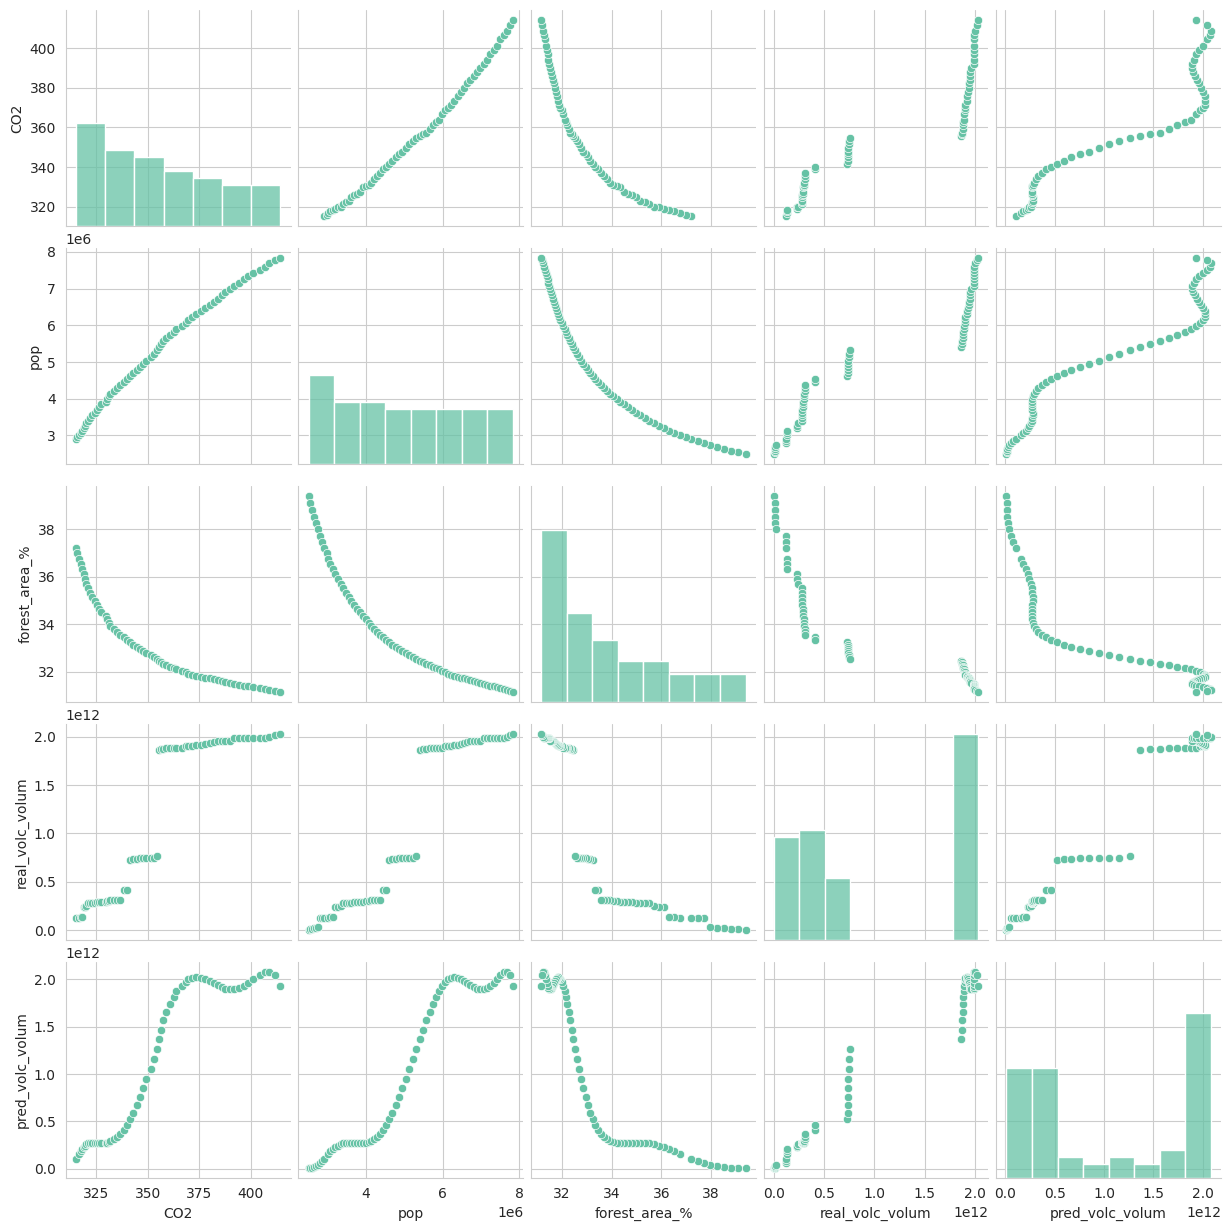

Mean squared error: 1.93
Coefficient of determination: 0.98
y = 2.7e-05 * pop + 4.56 * %_forest + -4e-12 * Vol_volc 69.87


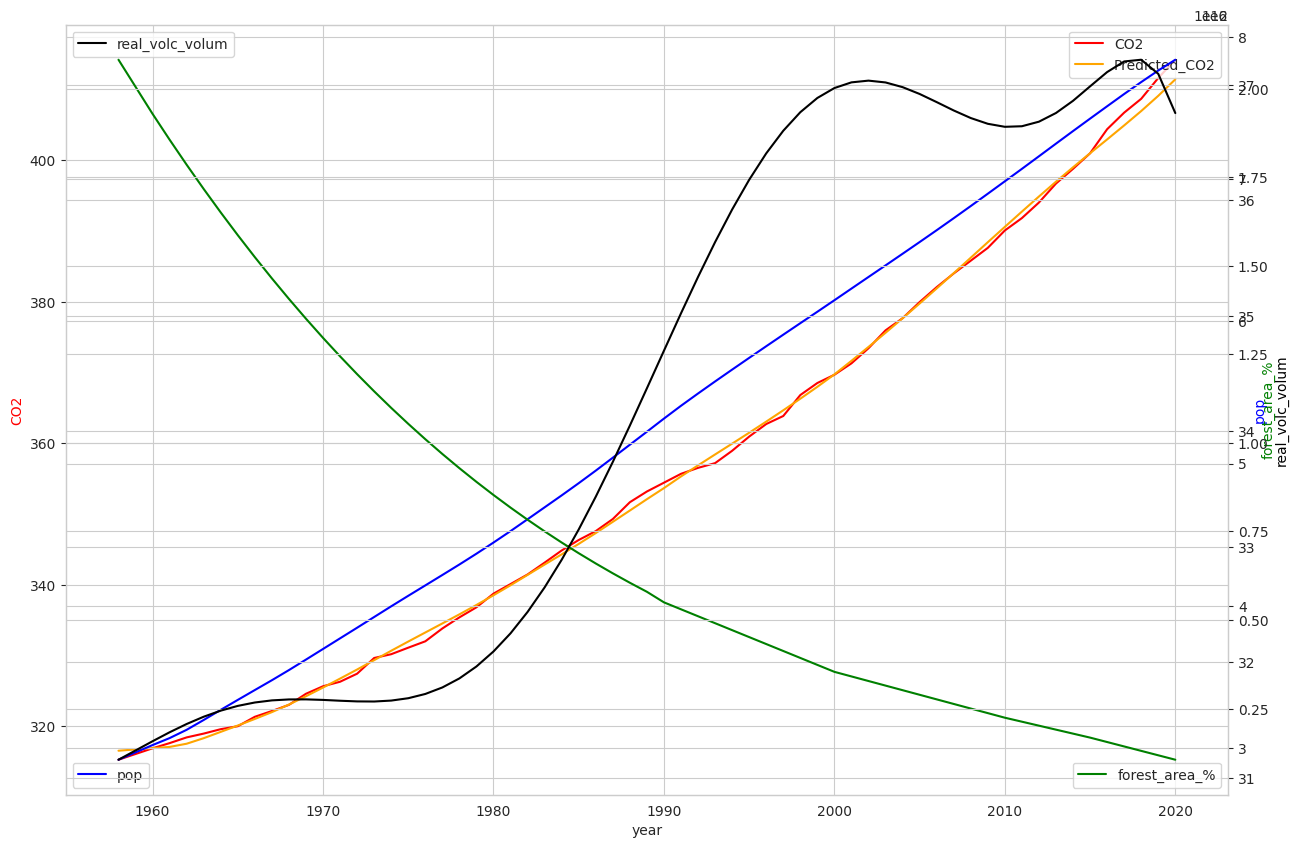

In [8]:
# creiamo un dataframe con i dati che ci interessano
#df1 = pd.read_csv(work_dir + '/CO2.csv').set_index('year')
df1 = pd.read_csv(work_dir + '/CO2_1.csv').set_index('year')
df2 = pd.read_csv(work_dir + '/pop.csv').drop(columns=['Unnamed: 0']).set_index('year')
df3 = pd.read_csv(work_dir + '/forest_area_poly.csv').rename(columns={'Predicted': 'forest_area_%'}).drop(columns=['Unnamed: 0']).set_index('year')
df4 = pd.read_csv(work_dir + '/vulcano.csv').rename(columns={'Real': 'real_volc_volum', 'Predicted': 'pred_volc_volum'}).drop(columns=['Unnamed: 0']).set_index('year')

# uniamo i dataframe
df = pd.concat([df1, df2, df3, df4], axis=1).sort_index()
df.drop(columns=['pop_density', 'pop_area'], inplace=True)

# eliminiamo l'ultima riga che contiene i dati del 2021
df = df[:-3]

df.to_csv(work_dir + '/CO2_pop_volc_forest.csv')

# calcoliamo la correlazione tra le varie colonne
corr = df.corr()

# creiamo una heatmap per visualizzare la correlazione
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# vediamo le pairplot tra le varie colonne
sns.pairplot(df)
plt.show()

# facciamo una regressione lineare multipla per calcolare il valore della CO2 in base alla popolazione e alla deforestazione
from sklearn.linear_model import LinearRegression

# creiamo un oggetto LinearRegression
lr = LinearRegression()

# eliminiamo le righe con valori nulli
df.dropna(inplace=True)

# convertiamo la colonna 'foest_area_%' in scala logaritmica
#df['forest_area_%'] = np.log(df['forest_area_%'])

# creiamo le variabili indipendenti e dipendenti
X = df[['pop', 'forest_area_%', 'pred_volc_volum']]
y = df['CO2']

# suddividiamo il dataset in train e test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# addestriamo il modello
lr.fit(X_train, y_train)

# facciamo le previsioni
y_pred = lr.predict(X_test)

# valutiamo il modello
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# scriviamo l'equazione della curva 
print('y = ' + str(round(lr.coef_[0], 6)) + ' * pop + ' + str(round(lr.coef_[1], 2)) + ' * %_forest + ' + str(round(lr.coef_[2], 12)) + ' * Vol_volc ' + ' + ' + str(round(lr.intercept_, 2)))

df['Predicted_CO2'] = lr.predict(X)

# visualiziamo su un grafico con assi separati i dati relativi alla CO2 e alla popolazione e alla deforestazione
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

ax1.plot(df.index, df['CO2'], color='red', label='CO2')
ax1.plot(df.index, df['Predicted_CO2'], color='orange', label='Predicted_CO2')
ax2.plot(df.index, df['pop'], color='blue', label='pop')
ax3.plot(df.index, df['forest_area_%'], color='green', label='forest_area_%')
ax4.plot(df.index, df['pred_volc_volum'], color='black', label='real_volc_volum')

ax1.set_xlabel('year')
ax1.set_ylabel('CO2', color='red')
ax2.set_ylabel('pop', color='blue')
ax3.set_ylabel('forest_area_%', color='green')
ax4.set_ylabel('real_volc_volum', color='black')
# spostare la legenda in alto a destra
ax1.legend(loc='upper right')
ax2.legend(loc='lower left')
ax3.legend(loc='lower right')
ax4.legend(loc='upper left')

plt.show()

In [9]:
# tra gli anni 1980 e 1990 la CO2 c'e' stato un cambio di tendenza 
# analiziamo i dati in questo periodo
df_tend = df.loc[1980:2000]

# calcoliamo le differenze di ogni variabile rispetto ai due estremi del periodo
diff_pop = df_tend['pop'].iloc[-1] - df_tend['pop'].iloc[0]
diff_forest = df_tend['forest_area_%'].iloc[-1] - df_tend['forest_area_%'].iloc[0]
diff_volc = df_tend['pred_volc_volum'].iloc[-1] - df_tend['pred_volc_volum'].iloc[0]

# calcoliamo le differenze percentuali
diff_pop_perc = round(diff_pop / df_tend['pop'].iloc[0] * 100, 2)
diff_volc_perc = round(diff_volc / df_tend['pred_volc_volum'].iloc[0] * 100, 2)

# visualizziamo i dati
print('pop: ' + str(diff_pop) + ' (' + str(diff_pop_perc) + '%)')
print('forest: ' + str(round(diff_forest, 2)) + ' %)')
print('volc: ' + str(diff_volc) + ' (' + str(diff_volc_perc) + '%)')


pop: 1704891.0 (38.36%)
forest: -1.53 %)
volc: 1590748512256.0 (386.81%)
